<a href="https://colab.research.google.com/github/shortcipher3/FairMOT/blob/master/mediapipe_iris_2d_landmarks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Use iris tflite model in python
## test on random data

In [1]:
!wget https://github.com/google/mediapipe/raw/master/mediapipe/models/iris_landmark.tflite

--2021-01-28 17:02:09--  https://github.com/google/mediapipe/raw/master/mediapipe/models/iris_landmark.tflite
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/iris_landmark.tflite [following]
--2021-01-28 17:02:10--  https://raw.githubusercontent.com/google/mediapipe/master/mediapipe/models/iris_landmark.tflite
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2640568 (2.5M) [application/octet-stream]
Saving to: ‘iris_landmark.tflite.1’

iris_landmark.tflit 100%[===================>]   2.52M  --.-KB/s    in 0.1s    

2021-01-28 17:02:10 (17.9 MB/s) - ‘iris_la

In [2]:
import tensorflow as tf
import numpy as np

In [3]:
img = np.random.randint(0, 256, (1,64,64,3), np.uint8)

img = (np.float32(img) - 0.0) / 255.0 # normalization (specified in tflite_converter_calculator, not in model card)

In [4]:
model_file = 'iris_landmark.tflite'
interpreter = tf.lite.Interpreter(
    model_path=model_file)
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(f'input_details {input_details}')
print(f'output_details {output_details}')

# check the type of the input tensor
floating_model = input_details[0]['dtype'] == np.float32
print(f'is floating model: {floating_model}')

# NxHxWxC, H:1, W:2
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

output_eyes = interpreter.get_tensor(output_details[0]['index'])[0]
output_iris = interpreter.get_tensor(output_details[1]['index'])[0]

input_details [{'name': 'input_1', 'index': 0, 'shape': array([ 1, 64, 64,  3], dtype=int32), 'shape_signature': array([ 1, 64, 64,  3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
output_details [{'name': 'output_eyes_contours_and_brows', 'index': 384, 'shape': array([  1, 213], dtype=int32), 'shape_signature': array([  1, 213], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}, {'name': 'output_iris', 'index': 385, 'shape': array([ 1, 15], dtype=int32), 'shape_signature': array([ 1, 15], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32)

In [5]:
print(f'output iris landmarks x {output_iris[::3]/64.0}') # tflite_tensors_to_landmarks_calculator normalization
print(f'output iris landmarks y {output_iris[1::3]/64.0}')
print(f'output iris landmarks z {output_iris[2::3]}')

print(f'output eye landmarks x {output_eyes[::3]/64.0}')
print(f'output eye landmarks y {output_eyes[1::3]/64.0}')
print(f'output eye landmarks z {output_eyes[2::3]}')

output iris landmarks x [0.64731467 0.687804   0.6417835  0.60508215 0.6542411 ]
output iris landmarks y [0.5789301  0.5702305  0.53433025 0.5895221  0.62458014]
output iris landmarks z [3.6796675 3.6204202 3.5882447 3.7643015 3.5973704]
output eye landmarks x [0.34881753 0.38156977 0.4154765  0.45583776 0.50549835 0.5478546
 0.58142406 0.6027913  0.6113906  0.37197143 0.3968622  0.4339534
 0.4858167  0.5301258  0.57181376 0.60068536 0.3195146  0.3541568
 0.3996545  0.46134037 0.5160323  0.56560856 0.60272014 0.624674
 0.6333039  0.31700355 0.34842438 0.39067268 0.4532619  0.5152059
 0.5655357  0.6161583  0.2876549  0.32739905 0.37593755 0.4531332
 0.5324789  0.5965026  0.639477   0.6659496  0.6812575  0.28502327
 0.30906948 0.3626377  0.43329418 0.5119122  0.5993658  0.65349233
 0.24333765 0.23799329 0.2507836  0.3114237  0.39369348 0.50207645
 0.1839753  0.277061   0.3474535  0.4454032  0.5559296  0.6235553
 0.67401767 0.70599717 0.7195927  0.18421848 0.20402324 0.26315644
 0.3600401

## Test on an image
* image must have exif
* I crop the image to avoid the letterbox effect
* In the mediapipe demo they crop around the face first, which I'm skipping, I think that is why the iris radius looks wrong

In [6]:
import cv2
import matplotlib.pyplot as plt

In [7]:
# flickr face image with permissive license https://www.flickr.com/photos/analumaximus/50805827783/in/photolist-2kpx9xZ-2kiucGW-2k2c9NR-2jRRdYb-2jfvTqX-2ikf4ev-2kdMCMX-2kkLpU3-2ig73we-2gdaQxW-2jFXt7f-2jm6xnQ-2j8aATL-2ggS7Bg-2j8fvCF-2hCqBL4-2jGx8LZ-2jKU299-2gT33Pv-2jgnsb5-2iidwGM-2ivi1Nx-2ioppT9-2kaJFCE-2i6x3Pw-2hHn7UC-2k368aE-2jECUPm-NRbFHD-2k7hgRB-2jq9tVD-2jvhxSw-2iw2vQn-2kmUa8R-2k1Ceom-2iNWDNZ-2iBLicP-2kq7Pkc-2hbDAJq-UbDMAm-2iJjNmL-KqRabm-V4VU5X-SXF3K9-2kitdi1-2hK2eNw-2i81Leg-2if6XMk-2hwzdUw-2jKwu2S
!wget -O test.jpg https://live.staticflickr.com/8274/30332924251_95da29f42b_o_d.jpg

--2021-01-28 17:02:13--  https://live.staticflickr.com/8274/30332924251_95da29f42b_o_d.jpg
Resolving live.staticflickr.com (live.staticflickr.com)... 13.224.26.167, 2600:9000:2164:a400:0:5a51:64c9:c681, 2600:9000:2164:fc00:0:5a51:64c9:c681, ...
Connecting to live.staticflickr.com (live.staticflickr.com)|13.224.26.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6762685 (6.4M) [image/jpeg]
Saving to: ‘test.jpg’

test.jpg            100%[===================>]   6.45M  --.-KB/s    in 0.09s   

2021-01-28 17:02:13 (70.3 MB/s) - ‘test.jpg’ saved [6762685/6762685]



In [8]:
image = cv2.imread('test.jpg')

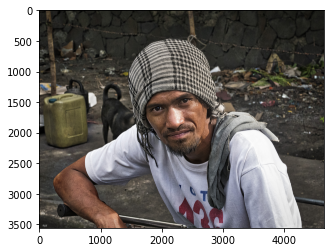

In [9]:
plt.imshow(image[:,:,::-1])

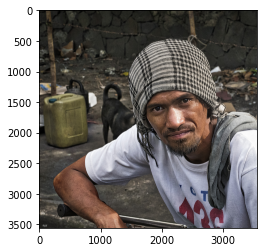

In [10]:
image_cropped = image[:image.shape[0], :image.shape[0], ::-1] # crop to avoid letterboxing step
plt.imshow(image_cropped)

In [11]:
img = cv2.resize(image_cropped, (64, 64))[np.newaxis, :, :, :]
img = (np.float32(img) - 0.0) / 255.0  # normalization (specified in tflite_converter_calculator, not in model card)

In [12]:
#img = (np.float32(img) - 0.0) / 255.0 # normalization (specified in tflite_converter_calculator, not in model card)
interpreter.set_tensor(input_details[0]['index'], img)

interpreter.invoke()

output_eyes = interpreter.get_tensor(output_details[0]['index'])[0]
output_iris = interpreter.get_tensor(output_details[1]['index'])[0]

In [13]:
print(f'output iris landmarks x {output_iris[::3]/64.0}') # tflite_tensors_to_landmarks_calculator normalization
print(f'output iris landmarks y {output_iris[1::3]/64.0}')

output iris landmarks x [0.53388405 0.59560853 0.5222004  0.47207874 0.54602665]
output iris landmarks y [0.54630476 0.53542966 0.4879888  0.5565755  0.60465103]


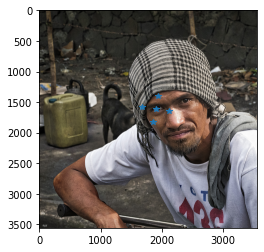

In [14]:
# cropped image
plt.imshow(image_cropped)
plt.plot(output_iris[::3]/64.0*image_cropped.shape[0], (1-output_iris[1::3]/64.0)*image_cropped.shape[1], '*')

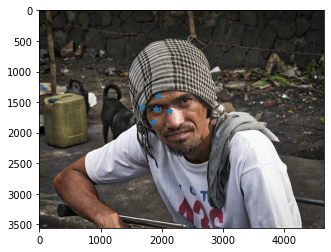

In [15]:
# original image
plt.imshow(image[:,:,::-1])
plt.plot(output_iris[::3]/64.0*image_cropped.shape[0], (1-output_iris[1::3]/64.0)*image_cropped.shape[1], '*')

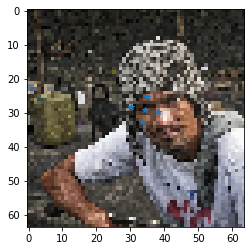

In [16]:
# resized image
plt.imshow(img[0,:,:,:])
plt.plot(output_iris[::3], (64-output_iris[1::3]), '*')